In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# helpers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# models
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv("heart.csv")
# Encode categorical variables using one hot encoding
categ_variables = ['Sex',
    'ChestPainType',
    'RestingECG',
    'ExerciseAngina',
    'ST_Slope']

df = pd.get_dummies(data=df, prefix=categ_variables, columns=categ_variables, dtype=int)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [5]:
features = [col for col in df.columns if col not in 'HeartDisease']
# Split the dataset
xtrain, xtest, ytrain, ytest = train_test_split(df[features], df['HeartDisease'], train_size=0.8)
len(xtrain), len(xtest)

(734, 184)

### Model

In [6]:
# Finding values for hyperparameters - 
#   min_samples_split: min. number of samples required to split
#   max_depth: max. allowed depth for the tree
#   n_estimators: no. of decision trees

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

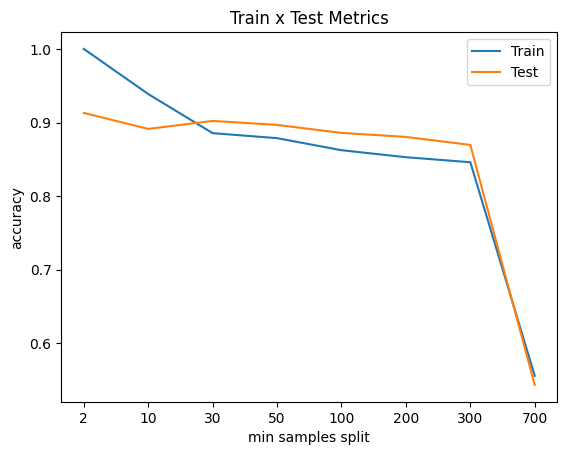

In [7]:
accuracy_train, accuracy_test = [], []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=min_samples_split).fit(xtrain, ytrain)
    
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)

    accuracy_train.append(accuracy_score(ytrain, pred_train))
    accuracy_test.append(accuracy_score(ytest, pred_test))

plt.title('Train x Test Metrics')
plt.xlabel('min samples split')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.ylabel('accuracy')

plt.plot(accuracy_train)
plt.plot(accuracy_test)
plt.legend(['Train', 'Test'])

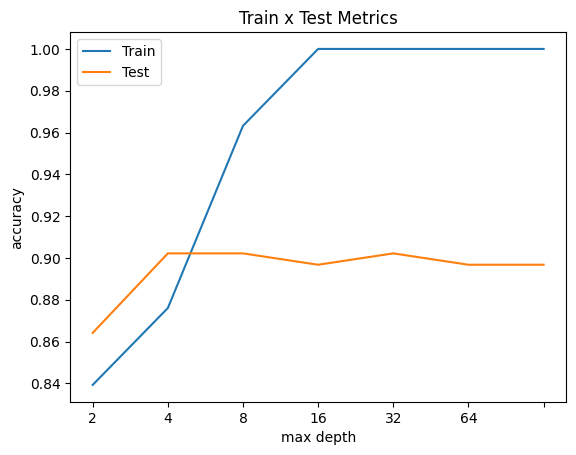

In [8]:
accuracy_train, accuracy_test = [], []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth=max_depth).fit(xtrain, ytrain)
    
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)

    accuracy_train.append(accuracy_score(ytrain, pred_train))
    accuracy_test.append(accuracy_score(ytest, pred_test))

plt.title('Train x Test Metrics')
plt.xlabel('max depth')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.ylabel('accuracy')

plt.plot(accuracy_train)
plt.plot(accuracy_test)
plt.legend(['Train', 'Test'])

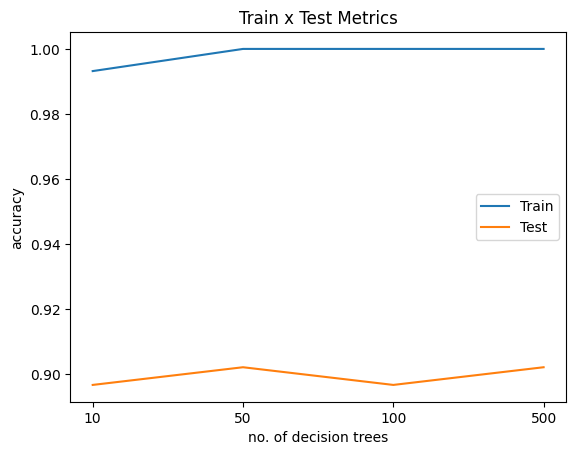

In [9]:
accuracy_train, accuracy_test = [], []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators).fit(xtrain, ytrain)
    
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)

    accuracy_train.append(accuracy_score(ytrain, pred_train))
    accuracy_test.append(accuracy_score(ytest, pred_test))

plt.title('Train x Test Metrics')
plt.xlabel('no. of decision trees')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.ylabel('accuracy')

plt.plot(accuracy_train)
plt.plot(accuracy_test)
plt.legend(['Train', 'Test'])

In [13]:
random_forest = RandomForestClassifier(n_estimators=70, min_samples_split=30, max_depth=32).fit(xtrain, ytrain)
pred_train = random_forest.predict(xtrain)
pred_test = random_forest.predict(xtest)

In [14]:
print(f"Train Accuracy: {accuracy_score(ytrain, pred_train)*100:.4f}%")
print(f"Test Accuracy: {accuracy_score(ytest, pred_test)*100:.4f}%")

Train Accuracy: 88.1471%
Test Accuracy: 90.2174%
